<a href="https://colab.research.google.com/github/iankim20/webCrawling/blob/main/uses_pytrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/WhoSearchWhat"

/content/drive/My Drive/WhoSearchWhat


In [ ]:
pip install pytrends


In [ ]:
# using crawlera for proxy

import requests
import random
from bs4 import BeautifulSoup as bs


# url = "http://icanhazip.com"
# proxy_host = "proxy.crawlera.com"
# proxy_port = "8010"
# proxy_auth = "<APIKEY>:"
# proxies = {
#        "https": f"https://{proxy_auth}@{proxy_host}:{proxy_port}/",
#        "http": f"http://{proxy_auth}@{proxy_host}:{proxy_port}/"
# }

# r = requests.get(url, proxies=proxies, verify=False)



def get_free_proxies():
    url = "https://free-proxy-list.net/"
    # get the HTTP response and construct soup object
    soup = bs(requests.get(url).content, "html.parser")
    proxies = []
    for row in soup.find("table", attrs={"id": "proxylisttable"}).find_all("tr")[1:]:
        tds = row.find_all("td")
        try:
            ip = tds[0].text.strip()
            port = tds[1].text.strip()
            host = f"{ip}:{port}"
            proxies.append(host)
        except IndexError:
            continue
    return proxies

proxies=get_free_proxies()

proxies = [
    '167.172.248.53:3128',
    '194.226.34.132:5555',
    '203.202.245.62:80',
    '141.0.70.211:8080',
    '118.69.50.155:80',
    '201.55.164.177:3128',
    '51.15.166.107:3128',
    '91.205.218.64:80',
    '128.199.237.57:8080',
]

def get_session(proxies):
    # construct an HTTP session
    session = requests.Session()
    # choose one random proxy
    proxy = random.choice(proxies)
    session.proxies = {"http": proxy, "https": proxy}
    return session

s = get_session(['118.33.73.149'])
print("Request page with IP:", s.get("http://icanhazip.com", timeout=1.5).text.strip())

proxies = {"http": "http://118.33.73.149:8899",
           "https": "http://118.33.73.149:8899"}
requests.get("http://icanhazip.com", proxies=proxies, timeout=1.5)

for i in range(10):
    s = get_session(proxies)
    try:
        print("Request page with IP:", s.get("http://icanhazip.com", timeout=1.5).text.strip())
    except Exception as e:
        continue

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
from datetime import *
from time import sleep



In [ ]:
# pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1)

KeyboardInterrupt: ignored

In [ ]:

# today = datetime.datetime.now()

# time = pd.Timestamp(2019,9,18,hour,min,sec)
# str_time = time.strftime("%Y%m%d_%H%M%S")

# startdate = '2019-11-01'
# enddate = str(today.date())
# timerange = startdate + ' ' + enddate
# timerange

'2019-11-01 2020-11-08'

In [ ]:
type("UsdfS") != str

False

In [ ]:
def get_df(startdate, enddate, keyword):
  pass

def count_over_time(y1,m1,d1, y2,m2,d2, keyword):
  startdate = pd.Timestamp(y1,m1,d1).strftime("%Y-%m-%d")
  enddate = pd.Timestamp(y2,m2,d2).strftime("%Y-%m-%d")

  pytrends = TrendReq(hl='en-US')
  timerange = startdate + ' ' + enddate
  pytrends.build_payload(keyword, timeframe = timerange)
  data =  pytrends.interest_over_time()
  data = data[keyword]

  return data

# def count_by_region(y1,m1,d1, y2,m2,d2, keyword):
#   startdate = pd.Timestamp(y1,m1,d1).strftime("%Y-%m-%d")
#   enddate = pd.Timestamp(y2,m2,d2).strftime("%Y-%m-%d")

#   pytrends = TrendReq(hl='en-US')
#   timerange = startdate + ' ' + enddate
#   pytrends.build_payload(keyword, timeframe = timerange)
#   data =  pytrends.interest_by_region()
#   data = data[keyword]

#   return data

def count_by_region(date, keyword):
  startdate = date.strftime("%Y-%m-%d")
  # enddate = pd.Timestamp(y2,m2,d2).strftime("%Y-%m-%d")

  pytrends = TrendReq(hl='en-US')
  timerange = startdate + ' ' + startdate
  pytrends.build_payload(keyword, timeframe = timerange)
  data =  pytrends.interest_by_region()
  data = data[keyword]

  return data


def count_sum_from(data,y,m,d):
  index = data.index >= pd.Timestamp(y,m,d)
  count_from = sum(data.iloc[index,0])

  return count_from

def count_sum_before(data,y,m,d):
  index = data.index <= pd.Timestamp(y,m,d)
  count_before = sum(data.iloc[index,0])

  return count_before

def count_sum_between(data,y1,m1,d1,y2,m2,d2):
  index = (data.index >= pd.Timestamp(y1,m1,d1)) & (data.index <= pd.Timestamp(y2,m2,d2))
  count_between = sum(data.iloc[index,0])

  return count_between




In [ ]:
(data_total.index > pd.Timestamp(2020,7,1)) & (data_total.index < pd.Timestamp(2020,10,1))

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_rows', None)

In [ ]:
pytrends = TrendReq(hl='en-US')     
keyword = ["coronavirus"]

In [ ]:
# timerange = startdate + ' ' + enddate
# timerange
# pytrends.build_payload(keyword, timeframe = timerange)

data_total = count_over_time(2019,11,1,2020,11,8,keyword)

data3 = count_over_time(2020,7,1,2020,11,8,keyword)
from_3to_total = count_sum_from(data_total,2020,7,1)*7/count_sum_from(data3,2020,7,1)

data2 = count_over_time(2019,11,1,2020,6,30,keyword)
from_2to_total = count_sum_before(data_total,2020,6,30)*7/count_sum_before(data2,2020,6,30)

data1 = count_over_time(2019,11,1,2020,1,20,keyword)
from_1to_total = 0.01 * from_2to_total

data0 = count_over_time(2019,11,1,2020,1,8,keyword)
from_0to_total = 0.01 * from_1to_total

data_reg = pytrends.interest_by_region()
region_list = data_reg.index.tolist()



NameError: ignored

In [ ]:
test = count_by_region(datetime(2020,11,1),keyword)

In [ ]:
type(test)

pandas.core.frame.DataFrame

In [ ]:
list[2] < datetime(2019,10,11)

False

In [ ]:
from random import randint
from time import sleep


list = pd.date_range(start="2019-11-1",end="2020-11-8").to_pydatetime().tolist()

In [ ]:
total_dataframe = pd.DataFrame(columns=['country'])
total_dataframe['country']=region_list

count = 0 
sleeps = []
for date in list:
  sleeptime = randint(1,123)/100
  colname = date.strftime("%Y-%m-%d")
  # print("sleeping for:", sleeptime, "seconds")
  df = count_by_region(date,['coronavirus'])                      #특정 날의 전세계 데이터
  if date <= datetime(2020,1,8):
    df /= sum(df.iloc[:,0])                                       #그 날 내에서 각 국가의 검색수를 모든 국가합으로 나눈 것.
    df *= data0.at[colname,'coronavirus']                         #각 날의 값의 곱해준다.
    df *= from_0to_total                                          #그 날의 값이 전체 timeframe 에서 나타내는 비율이 얼마인지 (위에서 '전체frame 합/국소 frame 합'으로 구한 것)
    
  elif (date > datetime(2020,1,8)) & (date <= datetime(2020,1,20)):
    sleeptime = randint(1,450)/100
    df /= sum(df.iloc[:,0])
    df *= data1.at[colname,'coronavirus']    
    df *= from_1to_total

  elif (date > datetime(2020,1,20)) & (date <= datetime(2020,6,30)):
    df /= sum(df.iloc[:,0])
    df *= data2.at[colname,'coronavirus']
    df *= from_2to_total
    
  elif (date > datetime(2020,6,30)) & (date <= datetime(2020,11,8)):
    sleeptime = randint(1,790)/100
    df /= sum(df.iloc[:,0])
    df *= data3.at[colname,'coronavirus']
    df *= from_3to_total
  
  else:
    print("something's wrong")

  mini_df = pd.DataFrame(df.iloc[:,0].tolist(),columns=[colname])

  if (count/50).is_integer():
    print("sleeping for:", sleeptime, "seconds")
    print("we are now at : ", date)
    print("sleeping is over")
  
  total_dataframe = pd.concat([total_dataframe,mini_df], axis=1)
  count+=1
  sleeps.append(sleeptime)

  sleep(sleeptime)
  # print("sleeping is over")



# pd.timedelta_range(pd.Timestamp(2020,11,1),pd.Timestamp(2020,11,3))

# pd.Timestamp(2020,11,8) - pd.Timestamep(2019,11,1)



In [ ]:
# df = total_dataframe['2020-01-09']

total_dataframe['2020-01-09']=df

In [ ]:
# df /= sum(df)              
# df *= data1.at['2020-01-09','coronavirus']
# df *= from_1to_total                 

0.043934821967410984

In [ ]:
total_dataframe.to_csv('./coronavirus/20191101_20201102_ratio.csv', index=False)

In [ ]:
total_dataframe = pd.read_csv('./coronavirus/20191101_20201102_ratio.csv')

In [ ]:
num = 92101073/(count_sum_before(data_total,2020,11,8)/12)

1192246.8996763753

In [ ]:
real_total.iloc[:,1:370] = total_dataframe.iloc[:,1:370] *num

# real_total = total_dataframe.apply(lambda x: x*num)

In [ ]:
real_total.to_csv('./coronavirus/20191101_20201102_real.csv', index=False)

cum_real_total.to_csv('./coronavirus/20191101_20201102_cum_real.csv', index=False)

check.to_csv('./coronavirus/20191101_20201102_cum_real_sorted.csv', index=False)

In [ ]:
cum_real_total = real_total

In [ ]:
df2=pd.DataFrame(names, columns=['names'])

check = df2.merge(cum_real_total,left_on='names', right_on = 'country').drop('names',axis=1)

In [ ]:
names =["Angola",
"Burundi",
"Benin",
"Burkina Faso",
"Botswana",
"Central African Republic",
"Côte d’Ivoire",
"Cameroon",
"Congo - Kinshasa",
"Congo - Brazzaville",
"Comoros",
"Cape Verde",
"Djibouti",
"Algeria",
"Egypt",
"Eritrea",
"Ethiopia",
"Gabon",
"Ghana",
"Guinea",
"Gambia",
"Guinea-Bissau",
"Equatorial Guinea",
"Kenya",
"Liberia",
"Libya",
"Lesotho",
"Morocco",
"Madagascar",
"Mali",
"Mozambique",
"Mauritania",
"Mauritius",
"Malawi",
"Namibia",
"Niger",
"Nigeria",
"Rwanda",
"Sudan",
"Senegal",
"Sierra Leone",
"Somalia",
"South Sudan",
"São Tomé & Príncipe",
"Eswatini",
"Seychelles",
"Chad",
"Togo",
"Tunisia",
"Tanzania",
"Uganda",
"South Africa",
"Zambia",
"Zimbabwe",
"Aruba",
"Argentina",
"Antigua & Barbuda",
"Bahamas",
"Belize",
"Bermuda",
"Bolivia",
"Brazil",
"Barbados",
"Canada",
"Chile",
"Colombia",
"Costa Rica",
"Cuba",
"Curaçao",
"Cayman Islands",
"Dominica",
"Dominican Republic",
"Ecuador",
"Grenada",
"Greenland",
"Guatemala",
"Guyana",
"Honduras",
"Haiti",
"Jamaica",
"St. Kitts & Nevis",
"St. Lucia",
"St. Martin",
"Mexico",
"Nicaragua",
"Panama",
"Peru",
"Puerto Rico",
"Paraguay",
"El Salvador",
"Suriname",
"Sint Maarten",
"Turks & Caicos Islands",
"Trinidad & Tobago",
"Uruguay",
"United States",
"St. Vincent & Grenadines",
"Venezuela",
"British Virgin Islands",
"U.S. Virgin Islands",
"Afghanistan",
"United Arab Emirates",
"Armenia",
"Azerbaijan",
"Bangladesh",
"Bahrain",
"Brunei",
"Bhutan",
"China",
"Cyprus",
"Georgia",
"Hong Kong",
"Indonesia",
"India",
"Iran",
"Iraq",
"Israel",
"Jordan",
"Japan",
"Kazakhstan",
"Kyrgyzstan",
"Cambodia",
"South Korea",
"Kuwait",
"Laos",
"Lebanon",
"Sri Lanka",
"Macao",
"Maldives",
"Myanmar (Burma)",
"Mongolia",
"Malaysia",
"Nepal",
"Oman",
"Pakistan",
"Philippines",
"North Korea",
"West Bank and Gaza",
"Qatar",
"Saudi Arabia",
"Singapore",
"Syria",
"Thailand",
"Tajikistan",
"Turkmenistan",
"Timor-Leste",
"Turkey",
"Uzbekistan",
"Vietnam",
"Yemen",
"Albania",
"Andorra",
"Austria",
"Belgium",
"Bulgaria",
"Bosnia & Herzegovina",
"Belarus",
"Switzerland",
"Czechia",
"Germany",
"Denmark",
"Spain",
"Estonia",
"Finland",
"France",
"Faroe Islands",
"United Kingdom",
"Gibraltar",
"Greece",
"Croatia",
"Hungary",
"Isle of Man",
"Ireland",
"Iceland",
"Italy",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"Latvia",
"Monaco",
"Moldova",
"North Macedonia",
"Malta",
"Montenegro",
"Netherlands",
"Norway",
"Poland",
"Portugal",
"Romania",
"Russia",
"San Marino",
"Serbia",
"Slovakia",
"Slovenia",
"Sweden",
"Ukraine",
"American Samoa",
"Australia",
"Fiji",
"Micronesia",
"Guam",
"Kiribati",
"Marshall Islands",
"Northern Mariana Islands",
"New Caledonia",
"Nauru",
"New Zealand",
"Palau",
"Papua New Guinea",
"French Polynesia",
"Solomon Islands",
"Tonga",
"Tuvalu",
"Vanuatu",
"Samoa"]

In [ ]:
for i in range(367):
  delta = cum_real_total.iloc[:,i+2]
  cum_real_total.iloc[:,i+2]=delta + cum_real_total.iloc[:,i+1]

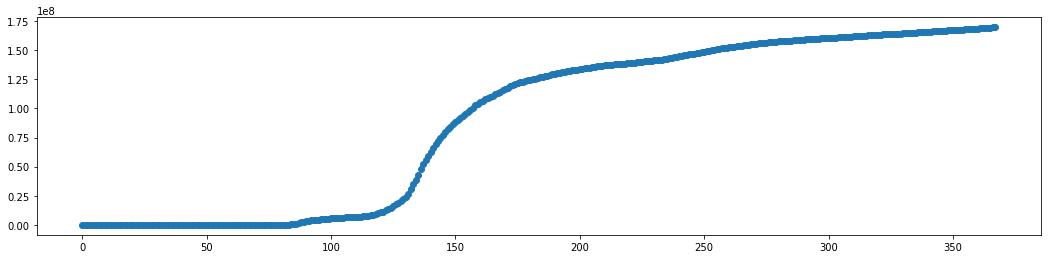

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,4))

plt.scatter(x=range(368), y=cum_real_total.iloc[237,1:])

In [ ]:
print(sum(total_dataframe['2020-01-09']))
print(sum(total_dataframe['2020-08-28']))
print(sum(total_dataframe['2020-08-29']))
print(sum(total_dataframe['2020-08-30']))
print(sum(total_dataframe['2020-08-31']))

data3.loc['2020-08-27':'2020-08-31']

0.043934821967410984


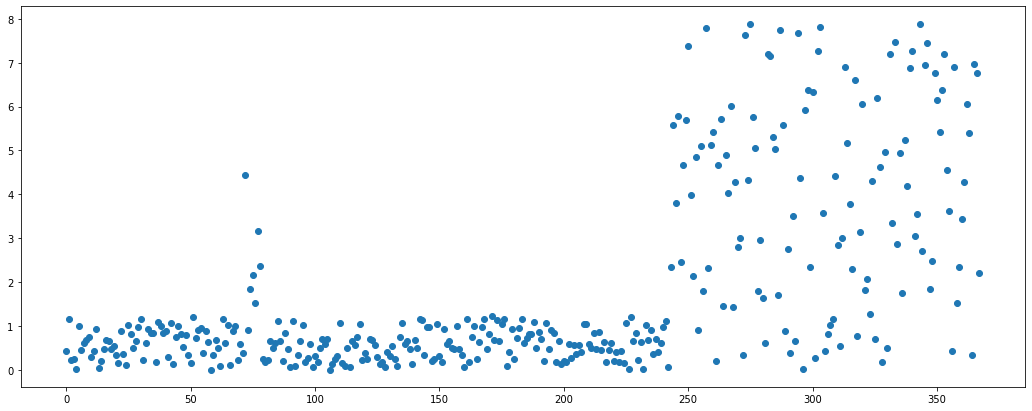

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
plt.scatter(x=range(len(sleeps)), y=np.asarray(sleeps))

In [ ]:
data = data.drop('isPartial', axis=1)


,coronavirus
date,
2020-07-01,87
2020-07-02,87
2020-07-03,86
2020-07-04,86
2020-07-05,100
...,...
2020-10-29,52
2020-10-30,50
2020-10-31,55


In [ ]:
# 전세계의 데이터 추출

result = pd.DataFrame()

#data request
pytrend.build_payload(kw_list=keyword, timeframe = timerange)



In [ ]:
data = pytrend.interest_by_region()

,coronavirus
geoName,
Afghanistan,0
Albania,0
Algeria,23
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0
